# Benchmarking 

Benchmark IHPF with INMF, PCA and NMF 

Pre-processing is applied for different methods 


In [7]:
from scipy.sparse import coo_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import AnnData

In [6]:
ihpf_performances = list()
for i in range(10,15):
    ihpf_df = pd.read_csv(f'Finalised_data/IHPF_noise_ratio_finalised_{i}.csv')
    ihpf_performances.append(ihpf_df)
ihpf_performances = pd.concat(ihpf_performances)

inmf_performances = list()
for i in range(10,15):
    inmf_df = pd.read_csv(f'Finalised_data/INMF_noise_ratio_finalised_{i}.csv')
    inmf_performances.append(inmf_df)
inmf_performances = pd.concat(inmf_performances)

hpf_performances = list()
for i in range(10,15):
    hpf_df = pd.read_csv(f'Finalised_data/HPF_noise_ratio_finalised_{i}.csv')
    hpf_performances.append(hpf_df)
hpf_performances = pd.concat(hpf_performances)

In [7]:
ihpf_performances.groupby(['dataset','noise_ratio']).agg(['mean','std',])[['cell_AMI','batch_AMI','cell_SC']].round(4)

cell_AMI         batch_AMI         cell_SC        
                              mean     std      mean     std    mean     std
dataset       noise_ratio                                                   
10Xmouse      0.001         0.9798  0.0001    0.4984  0.0000  0.9655  0.0027
              0.010         0.9770  0.0008    0.4979  0.0006  0.9516  0.0012
              0.100         0.9081  0.0026    0.4451  0.0018  0.8131  0.0011
              0.250         0.5186  0.0102    0.1847  0.0060  0.6501  0.0034
              0.500         0.2201  0.0113    0.0317  0.0043  0.5869  0.0008
              0.750         0.1601  0.0089    0.0117  0.0023  0.5809  0.0017
10Xpbmc       0.001         0.6230  0.0459    0.6753  0.0279  0.4979  0.0338
              0.010         0.5706  0.0501    0.5511  0.0605  0.4345  0.0200
              0.100         0.4257  0.0423    0.3962  0.0392  0.3501  0.0362
              0.250         0.2568  0.0548    0.2506  0.0495  0.2675  0.0252
              0.500         0.1682  0.0653    0.1696  0.0592  0.2334  0.0241
              0.750         0.0933  0.0104    0.0991  0.0103  0.2112  0.0247
humanpancreas 0.001         0.6285  0.0134    0.1788  0.0304  0.5235  0.0198
              0.010         0.6244  0.0315    0.1735  0.0327  0.5035  0.0256
              0.100         0.5981  0.0412    0.1205  0.0365  0.4905  0.0581
              0.250         0.6025  0.0557    0.1585  0.0604  0.5237  0.0330
              0.500         0.6270  0.0426    0.1215  0.0377  0.5413  0.0337
              0.750         0.6126  0.0395    0.0965  0.0089  0.5218  0.0286

In [66]:
hpf_performances.groupby(['dataset','noise_ratio']).agg(['mean','std',])[['cell_AMI','batch_AMI','cell_SC']].round(4)

cell_AMI         batch_AMI         cell_SC        
                              mean     std      mean     std    mean     std
dataset       noise_ratio                                                   
10Xmouse      0             0.9811  0.0000    0.4984  0.0000  0.9311  0.0003
10Xpbmc       0             0.6283  0.0305    0.6509  0.0217  0.5320  0.0385
humanpancreas 0             0.5930  0.0428    0.2322  0.0413  0.4494  0.0530

In [6]:
inmf_performances.groupby(['dataset','noise_ratio']).agg(['mean','std',])[['cell_AMI','batch_AMI','cell_SC']].round(4)

cell_AMI         batch_AMI         cell_SC        
                              mean     std      mean     std    mean     std
dataset       noise_ratio                                                   
10Xmouse      0.1           0.3712  0.0000    0.1530  0.0000  0.4573  0.0000
              1.0           0.4066  0.0000    0.1701  0.0000  0.4581  0.0000
10Xpbmc       0.1           0.3142  0.0001    0.2850  0.0000  0.4591  0.0002
              1.0           0.3233  0.0001    0.2967  0.0001  0.4456  0.0004
humanpancreas 0.1           0.3917  0.0001    0.0754  0.0000 -0.2993  0.0001
              1.0           0.2759  0.0001    0.2595  0.0002 -0.2284  0.0003

In [9]:
benchmark_performances.groupby(['method','dataset',]).agg(['mean','std',])[['cell_AMI','batch_AMI','cell_SC']].round(4)

cell_AMI         batch_AMI         cell_SC        
                            mean     std      mean     std    mean     std
method    dataset                                                         
BBKNN     10Xmouse        0.1588  0.0000    0.1302  0.0000  0.0043  0.0000
          10Xpbmc         0.4883  0.0000    0.4825  0.0000  0.0214  0.0000
          humanpancreas   0.4049  0.0000    0.2738  0.0000  0.0208  0.0000
PCA       10Xmouse        0.9710  0.0000    0.4984  0.0000  0.8602  0.0000
          10Xpbmc         0.6156  0.0000    0.6048  0.0000  0.4099  0.0000
          humanpancreas   0.4455  0.0000    0.5655  0.0000  0.3450  0.0000
Scanorama 10Xmouse        0.9667  0.0000    0.4948  0.0000  0.4547  0.0000
          10Xpbmc         0.6127  0.0000    0.5307  0.0000  0.3445  0.0000
          humanpancreas   0.3542  0.0000    0.3581  0.0000  0.2730  0.0000
scVI      10Xmouse        0.5229  0.0113    0.2924  0.0081  0.1150  0.0056
          10Xpbmc         0.2325  0.0206    0.2172  0.0186  0.0832  0.0055
          humanpancreas   0.6064  0.0460    0.0698  0.0259  0.2067  0.0097

In [2]:
## Import scripts for the dimension reduction methods 
import IHPF
import INMF 
import schpf
from sklearn.decomposition import PCA

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn import preprocessing

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(font_scale=1.25)
sb.set_style("whitegrid")

In [5]:
datasets = ['10Xmouse','humanpancreas','10Xpbmc']

#### Sequencing Depth 

Each dataset contains the pre-processed merged counts from various batches with the cell types labels (actual) and batch labels (batch)

In [ ]:
for dataset in datasets:
    mouse = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    mouse.obs['sequencing_depth'] = mouse.X.sum(axis=1)
    print(mouse.obs.groupby('batch')['sequencing_depth'].median)

In [ ]:
mouse.obs

## Data Visualisation and Block structure 

### TSNE 

In [1]:
datasets = ['10Xmouse','humanpancreas','10Xpbmc',]

In [7]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import scanpy as sc

In [ ]:
for dataset in datasets:
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    for method in ['IHPF_0.001','IHPF_0.01', 'IHPF_0.5', 'PCA']:
        adata.obsm['{}_TSNE'.format(method)] = TSNE(n_jobs=40).fit_transform(normalize(adata.obsm[method]))
    adata.write('../Data/{}_v4_processed.h5ad'.format(dataset))

### Figure 5

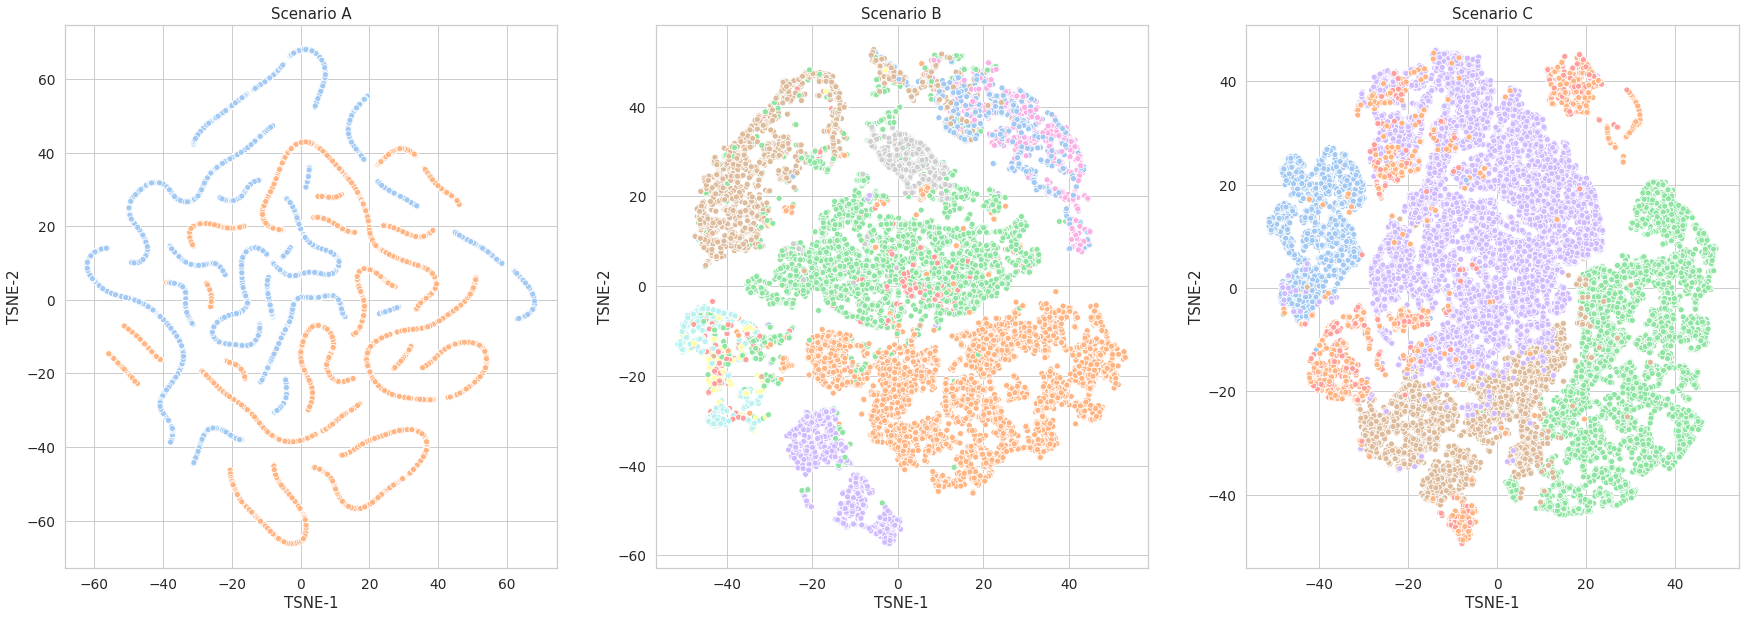

In [8]:
f, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=False)
#f.suptitle('TSNE heatmaps of IHPF in different scenraios')

flatui = sb.color_palette("pastel",20)
sb.set_palette(flatui,10)

datasets = ['10Xmouse','humanpancreas','10Xpbmc']
names_maps = {'10Xmouse':'Scenario A', 'humanpancreas':'Scenario B', '10Xpbmc':'Scenario C',}
i = 0
for dataset in datasets:
    batch_labels = 'batch'
    cell_labels = 'actual' 
    if dataset == '10Xmouse':
        method = 'IHPF_0.001'
    if dataset == 'humanpancreas':
        method = 'IHPF_0.5'
    if dataset == '10Xpbmc':
        method = 'IHPF_0.01'
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    adata.obs['cell types'] = adata.obs[cell_labels]
    sb.scatterplot(adata.obsm['{}_TSNE'.format(method)][:,0], adata.obsm['{}_TSNE'.format(method)][:,1], hue=adata.obs['cell types'],legend=False,ax=axes[i])
    axes[i].set(xlabel='TSNE-1', ylabel='TSNE-2',title='{}'.format(names_maps[dataset]))
    i = i + 1
plt.savefig('../Result/TSNE_IHPF_cell_v7.pdf'.format(),format='pdf')

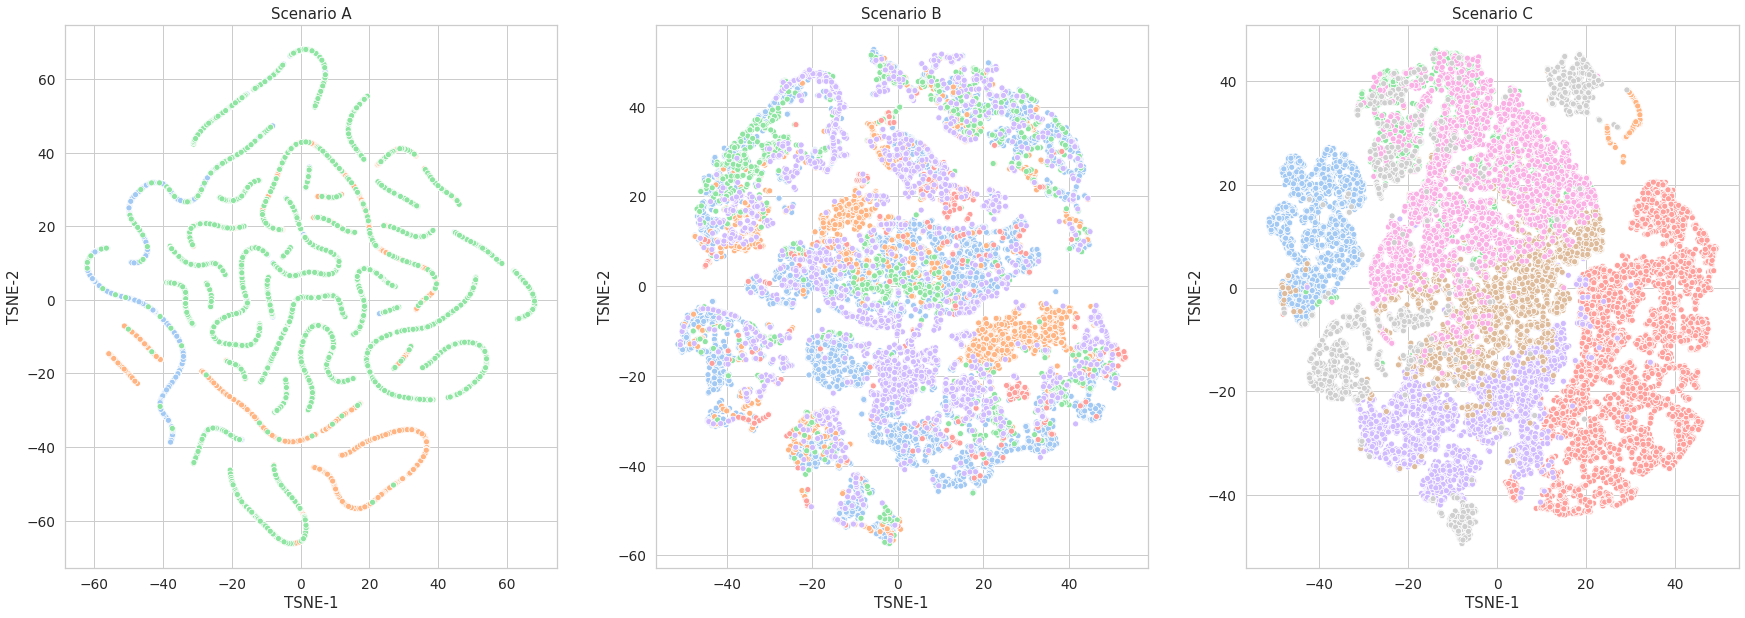

In [9]:
f, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=False)
#f.suptitle('TSNE heatmaps of IHPF in different scenraios')

flatui = sb.color_palette("pastel",20)
sb.set_palette(flatui,10)

datasets = ['10Xmouse','humanpancreas','10Xpbmc',]
names_maps = {'10Xmouse':'Scenario A', 'humanpancreas':'Scenario B', '10Xpbmc':'Scenario C',}
i = 0
for dataset in datasets:
    batch_labels = 'batch'
    cell_labels = 'actual'   
    if dataset == '10Xmouse':
        method = 'IHPF_0.001'
    if dataset == 'humanpancreas':
        method = 'IHPF_0.5'
    if dataset == '10Xpbmc':
        method = 'IHPF_0.01'
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    rename_labels = {'293t':'ID 1', 'jurkat': 'ID 2', 'jurkat_293t_50_50': 'ID 3', 'pancreas_inDrop':'ID 4',
                    'pancreas_multi_celseq2_expression_matrix': 'ID 5', 'pancreas_multi_celseq_expression_matrix': 'ID 8',
                    'pancreas_multi_fluidigmc1_expression_matrix': 'ID 6', 'pancreas_multi_smartseq2_expression_matrix': 'ID 7',
                    'b_cells': 'ID 9', 'cd14_monocytes' : 'ID 10', 'cd4_t_helper' :'ID 11', 'cd56_nk': 'ID 12',
                    'cytotoxic_t': 'ID 13', 'memory_t': 'ID 14','regulatory_t': 'ID 15', 'pbmc_10X': 'ID 16', }
    renamed_labels = [ rename_labels[x] for x in adata.obs[batch_labels] ]
    sb.scatterplot(adata.obsm['{}_TSNE'.format(method)][:,0], adata.obsm['{}_TSNE'.format(method)][:,1], hue=renamed_labels, legend=False, ax=axes[i])
    axes[i].set(xlabel='TSNE-1', ylabel='TSNE-2',title='{}'.format(names_maps[dataset]))
    i = i + 1
plt.savefig('../Result/TSNE_IHPF_batch_v7.pdf'.format(),format='pdf')

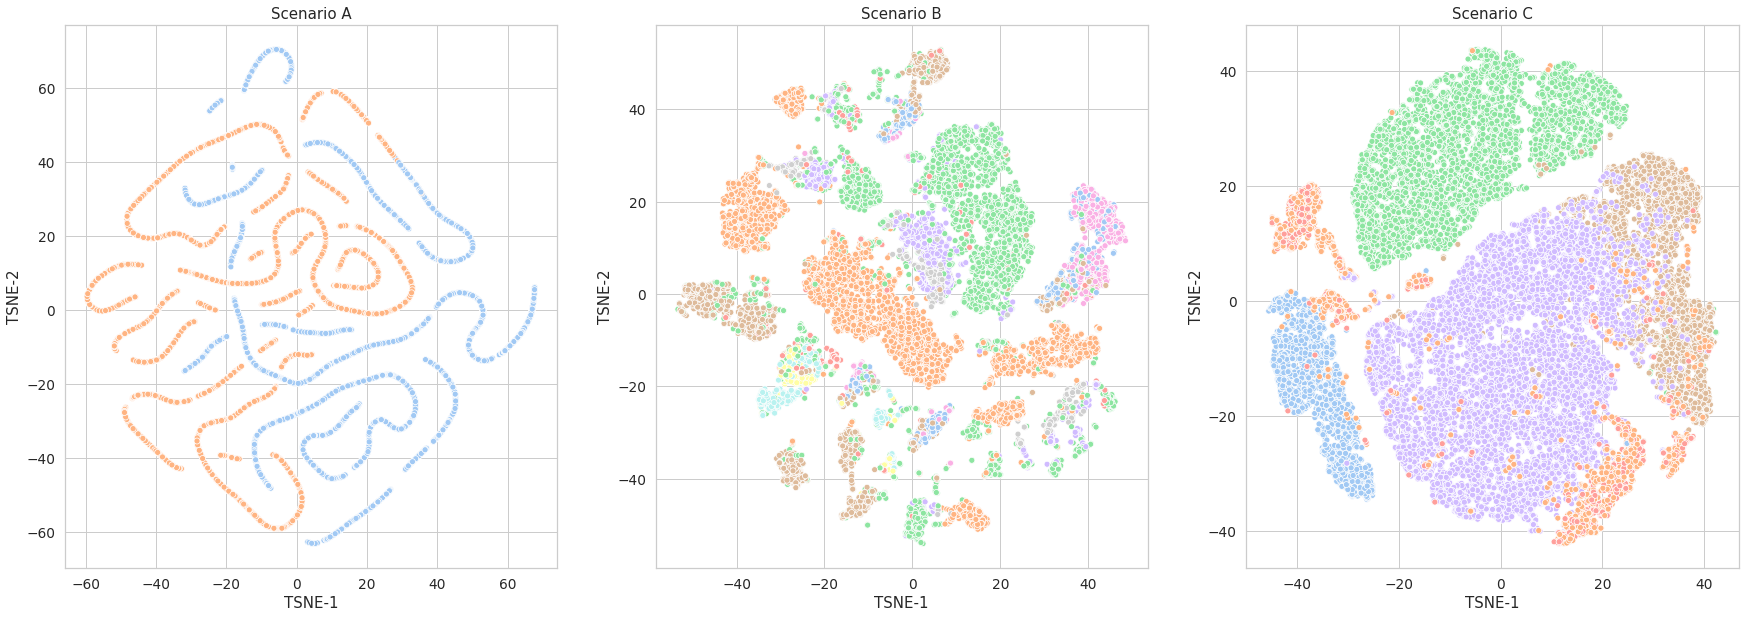

In [10]:
f, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=False)
#f.suptitle('TSNE heatmaps of PCA in different scenraios')

flatui = sb.color_palette("pastel",20)
sb.set_palette(flatui,10)

datasets = ['10Xmouse','humanpancreas','10Xpbmc']
names_maps = {'10Xmouse':'Scenario A', 'humanpancreas':'Scenario B', '10Xpbmc':'Scenario C',}
i = 0
for dataset in datasets:
    batch_labels = 'batch'
    cell_labels = 'actual'   
    method = 'PCA'
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    adata.obs['cell types'] = adata.obs[cell_labels]
    sb.scatterplot(adata.obsm['{}_TSNE'.format(method)][:,0], adata.obsm['{}_TSNE'.format(method)][:,1], hue=adata.obs['cell types'],legend=False, ax=axes[i])
    axes[i].set(xlabel='TSNE-1', ylabel='TSNE-2',title='{}'.format(names_maps[dataset]))
    i = i + 1
plt.savefig('../Result/TSNE_PCA_cell_v7.pdf'.format(),format='pdf')

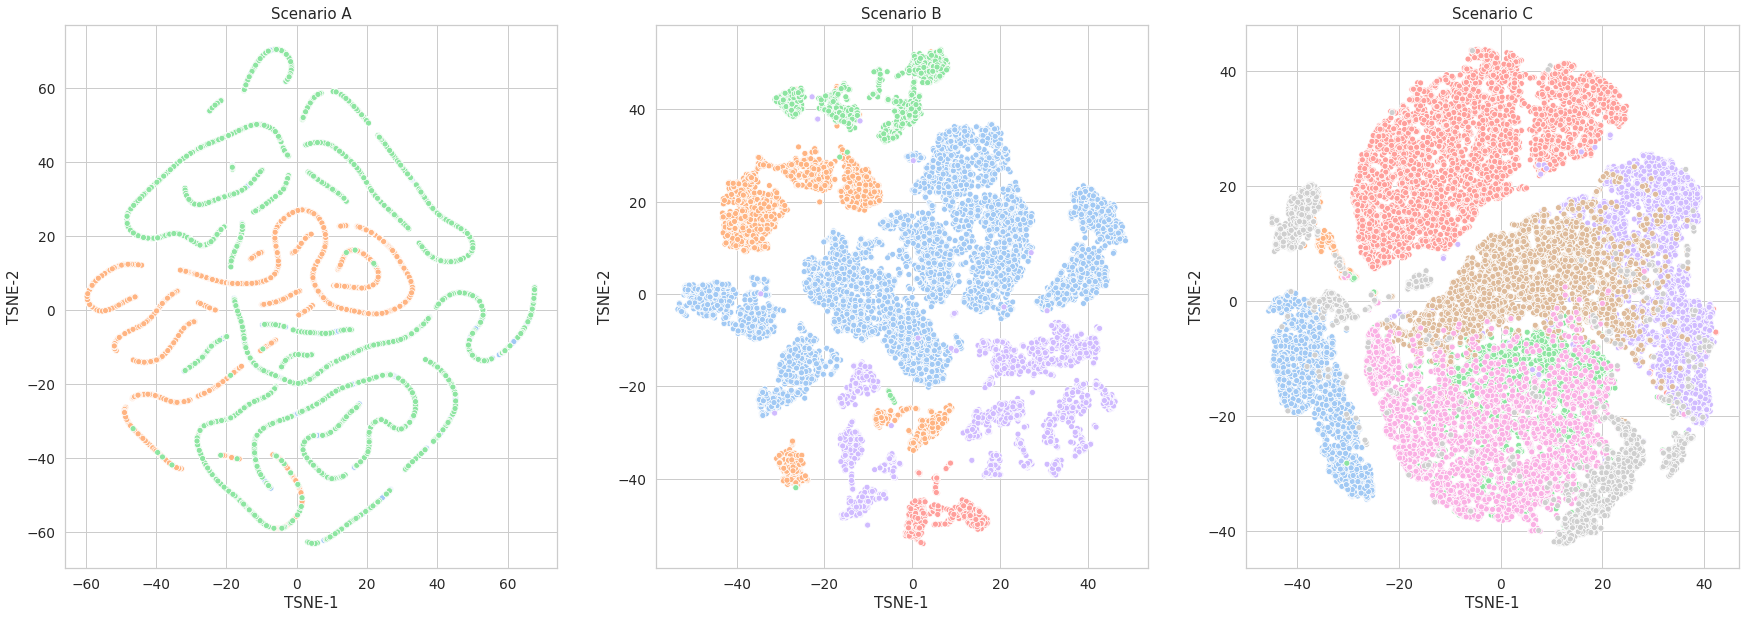

In [15]:
f, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=False)
# f.suptitle('TSNE heatmaps of PCA in different scenraios')

flatui = sb.color_palette("pastel",20)
sb.set_palette(flatui,10)

datasets = ['10Xmouse','humanpancreas','10Xpbmc']
names_maps = {'10Xmouse':'Scenario A', 'humanpancreas':'Scenario B', '10Xpbmc':'Scenario C',}
i = 0
for dataset in datasets:
    batch_labels = 'batch'
    cell_labels = 'actual'   
    method = 'PCA'
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    ## rename batch labels 
    rename_labels = {'293t':'ID 1', 'jurkat': 'ID 2', 'jurkat_293t_50_50': 'ID 3', 'pancreas_inDrop':'ID 4',
                    'pancreas_multi_celseq2_expression_matrix': 'ID 5', 'pancreas_multi_celseq_expression_matrix': 'ID 8',
                    'pancreas_multi_fluidigmc1_expression_matrix': 'ID 6', 'pancreas_multi_smartseq2_expression_matrix': 'ID 7',
                    'b_cells': 'ID 9', 'cd14_monocytes' : 'ID 10', 'cd4_t_helper' :'ID 11', 'cd56_nk': 'ID 12',
                    'cytotoxic_t': 'ID 13', 'memory_t': 'ID 14','regulatory_t': 'ID 15', 'pbmc_10X': 'ID 16', }
    renamed_labels = [ rename_labels[x] for x in adata.obs[batch_labels] ]
    sb.scatterplot(adata.obsm['{}_TSNE'.format(method)][:,0], adata.obsm['{}_TSNE'.format(method)][:,1], hue=renamed_labels, legend=False, ax=axes[i])
    axes[i].set(xlabel='TSNE-1', ylabel='TSNE-2', title='{}'.format(names_maps[dataset]), )
    i = i + 1
plt.savefig('../Result/TSNE_PCA_batch_v7.pdf'.format(),format='pdf')

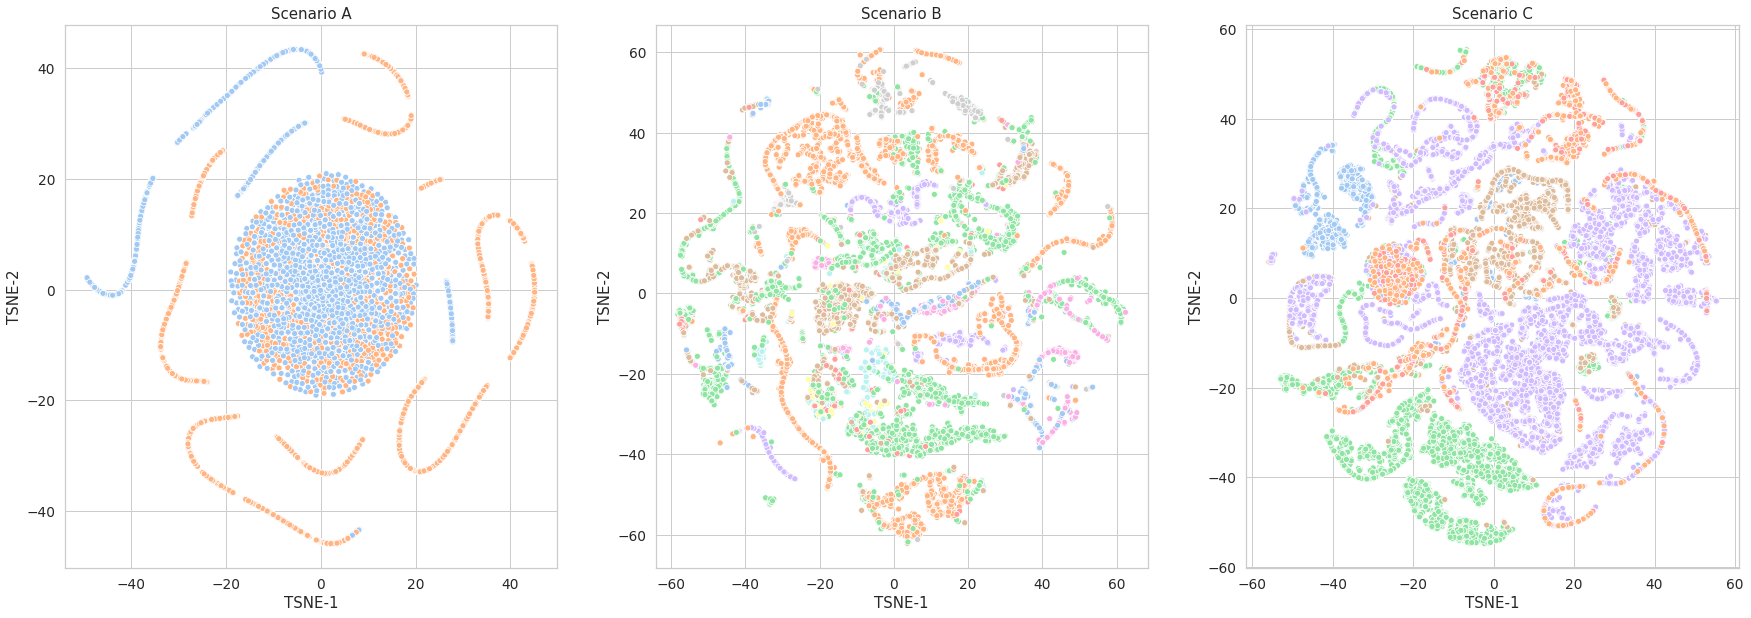

In [12]:
f, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=False)
#f.suptitle('TSNE heatmaps of INMF in different scenraios')

flatui = sb.color_palette("pastel",20)
sb.set_palette(flatui,10)

datasets = ['10Xmouse','humanpancreas','10Xpbmc']
names_maps = {'10Xmouse':'Scenario A', 'humanpancreas':'Scenario B', '10Xpbmc':'Scenario C',}
i = 0
for dataset in datasets:
    batch_labels = 'batch'
    cell_labels = 'actual'   
    method = 'INMF'
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    adata.obs['cell types'] = adata.obs[cell_labels]
    sb.scatterplot(adata.obsm['{}_TSNE'.format(method)][:,0], adata.obsm['{}_TSNE'.format(method)][:,1], hue=adata.obs['cell types'],legend=False, ax=axes[i])
    axes[i].set(xlabel='TSNE-1', ylabel='TSNE-2',title='{}'.format(names_maps[dataset]))
    i = i + 1
plt.savefig('../Result/TSNE_INMF_cell_v7.pdf'.format(),format='pdf')

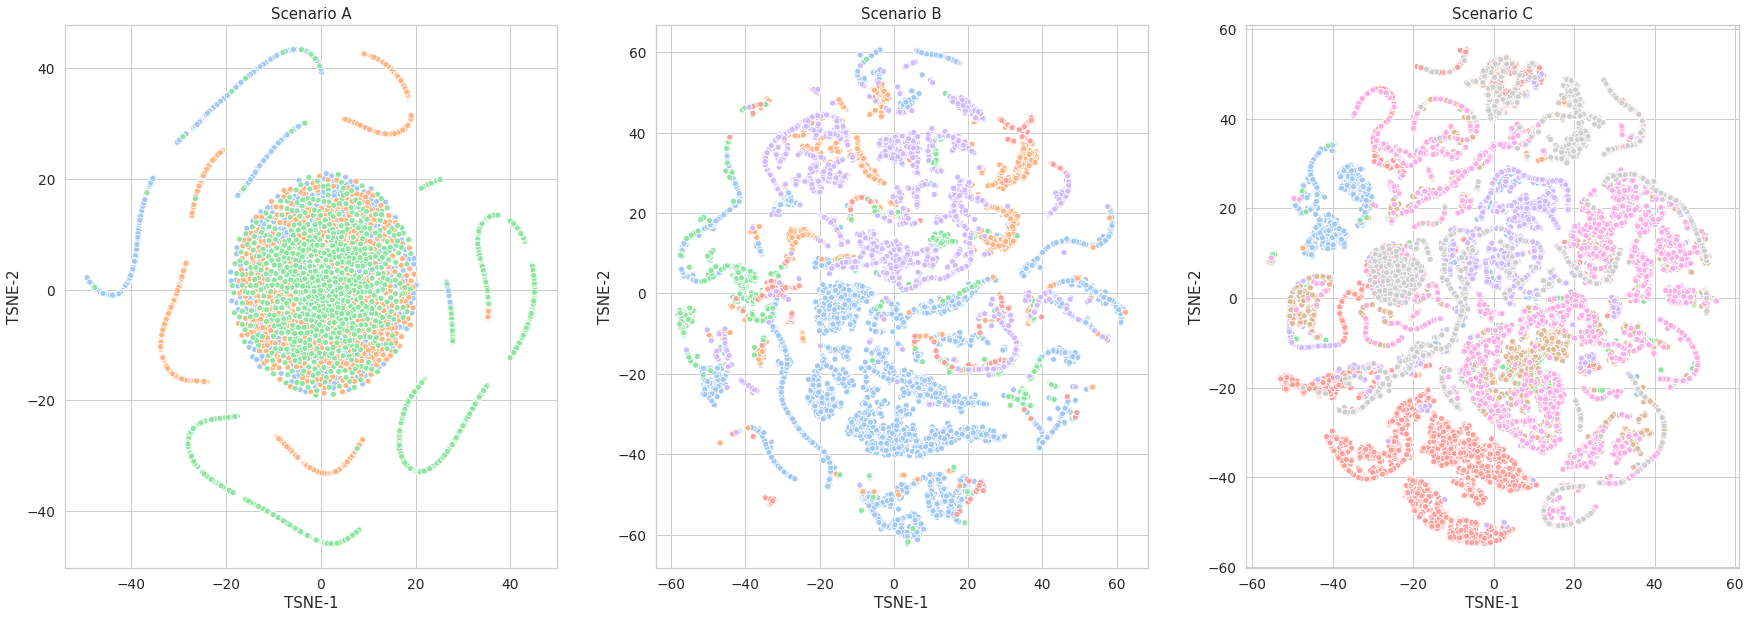

In [14]:
f, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=False)
#f.suptitle('TSNE heatmaps of INMF in different scenraios')

flatui = sb.color_palette("pastel",20)
sb.set_palette(flatui,10)

datasets = ['10Xmouse','humanpancreas','10Xpbmc']
names_maps = {'10Xmouse':'Scenario A', 'humanpancreas':'Scenario B', '10Xpbmc':'Scenario C',}
i = 0
for dataset in datasets:
    batch_labels = 'batch'
    cell_labels = 'actual'   
    method = 'INMF'
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    ## rename batch labels 
    rename_labels = {'293t':'ID 1', 'jurkat': 'ID 2', 'jurkat_293t_50_50': 'ID 3', 'pancreas_inDrop':'ID 4',
                    'pancreas_multi_celseq2_expression_matrix': 'ID 5', 'pancreas_multi_celseq_expression_matrix': 'ID 8',
                    'pancreas_multi_fluidigmc1_expression_matrix': 'ID 6', 'pancreas_multi_smartseq2_expression_matrix': 'ID 7',
                    'b_cells': 'ID 9', 'cd14_monocytes' : 'ID 10', 'cd4_t_helper' :'ID 11', 'cd56_nk': 'ID 12',
                    'cytotoxic_t': 'ID 13', 'memory_t': 'ID 14','regulatory_t': 'ID 15', 'pbmc_10X': 'ID 16', }
    renamed_labels = [ rename_labels[x] for x in adata.obs[batch_labels] ]
    sb.scatterplot(adata.obsm['{}_TSNE'.format(method)][:,0], adata.obsm['{}_TSNE'.format(method)][:,1], hue=renamed_labels, legend=False, ax=axes[i])
    axes[i].set(xlabel='TSNE-1', ylabel='TSNE-2', title='{}'.format(names_maps[dataset]), )
    i = i + 1
plt.savefig('../Result/TSNE_INMF_batch_v7.pdf'.format(),format='pdf')

### Figure 7 and 9

In [ ]:
Plot_no = len(datasets)
f, axes = plt.subplots(Plot_no, 3, figsize=(36, 21))
#f.suptitle('Heatmap of latent factors for different data integration methods'.format())

datasets = ['10Xmouse','humanpancreas','10Xpbmc']
names_maps = {'10Xmouse':'Scenario A', 'humanpancreas':'Scenario B', '10Xpbmc':'Scenario C',}

j = 0 
for dataset in datasets:
    batch_labels = 'batch'
    cell_labels = 'actual'  
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    # sort the cell score by cell types
    cell_score_df = pd.DataFrame(adata.obsm['PCA'])
    cell_score_df['labels'] = adata.obs[cell_labels].values
    cell_score_df = cell_score_df.set_index(['labels']).sort_index() 
    # Take log for INMF cell scores to bring it back to scale 
    cell_score_df2 = pd.DataFrame(np.log(adata.obsm['INMF']+1e-8))
    cell_score_df2['labels'] = adata.obs[cell_labels].values
    cell_score_df2 = cell_score_df2.set_index(['labels']).sort_index()
    ## IHPF 
    if dataset == '10Xmouse':
        method = 'IHPF_0.001'
    if dataset == 'humanpancreas':
        method = 'IHPF_0.5'
    if dataset == '10Xpbmc':
        method = 'IHPF_0.01'
    cell_score_df3 = pd.DataFrame(adata.obsm[method])
    cell_score_df3['labels'] = adata.obs[cell_labels].values
    cell_score_df3 = cell_score_df3.set_index(['labels']).sort_index()
    sb.set(font_scale=2)
    # Plot heatmap 
    sb.heatmap(cell_score_df, ax=axes[j,0], ).set(xlabel='Factors', ylabel='Cells', title='{} PCA'.format(names_maps[dataset]))
    sb.heatmap(cell_score_df2, ax=axes[j,1],).set(xlabel='Factors', ylabel='Cells', title='{} INMF'.format(names_maps[dataset]))
    sb.heatmap(cell_score_df3, ax=axes[j,2],).set(xlabel='Factors', ylabel='Cells', title='{} IHPF'.format(names_maps[dataset]))
    j += 1
    
f.savefig('../Result/Dataset_techs_cellmaps_all_v5.pdf'.format(),format='pdf')

In [ ]:
# Gene Scores block structure 
from sklearn.cluster import AgglomerativeClustering, SpectralCoclustering

In [ ]:
Plot_no = len(datasets)
f, axes = plt.subplots(Plot_no, 3, figsize=(36, 21))
#f.suptitle('Heatmap of latent factors for different data integration methods'.format())

datasets = ['10Xmouse','humanpancreas','10Xpbmc']
names_maps = {'10Xmouse':'Scenario A', 'humanpancreas':'Scenario B', '10Xpbmc':'Scenario C',}

j = 0 
for dataset in datasets:
    sb.set(font_scale=1)
    batch_labels = 'batch'
    cell_labels = 'actual'  
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    # PCA gene scores 
    data= pd.DataFrame(adata.varm['PCA'])
    n_factors = adata.varm['PCA'].shape[1]
    model = SpectralCoclustering(n_clusters=n_factors, random_state=0).fit(data)
    fit_data = pd.DataFrame(data.iloc[np.argsort(model.row_labels_),:])
    sb.heatmap(fit_data, ax=axes[j, 0], xticklabels=True, yticklabels=False).set(xlabel='Factors', ylabel='Genes', title='{} PCA'.format(names_maps[dataset]))
    # INMF gene scores 
    ## Add small value to avoid numerical error in eigenvector decomposition 
    data = pd.DataFrame(adata.varm['INMF']) + 1e-8
    n_factors = adata.varm['INMF'].shape[1]
    model = SpectralCoclustering(n_clusters=n_factors, random_state=0).fit(data)
    fit_data = pd.DataFrame(data.iloc[np.argsort(model.row_labels_),:])
    newdata = pd.DataFrame(np.log(fit_data))
    sb.heatmap(newdata, ax=axes[j, 1], xticklabels=True, yticklabels=False).set(xlabel='Factors', ylabel='Genes', title='{} INMF'.format(names_maps[dataset]))    
    # IHPF gene scores 
    if dataset == '10Xmouse':
        method = 'IHPF_0.001'
    if dataset == 'humanpancreas':
        method = 'IHPF_0.5'
    if dataset == '10Xpbmc':
        method = 'IHPF_0.01'
    data= pd.DataFrame(adata.varm[method])
    n_factors = adata.varm[method].shape[1]
    model = SpectralCoclustering(n_clusters=n_factors, random_state=0).fit(data)
    #fit_data = pd.DataFrame(data.iloc[np.argsort(model.row_labels_),np.argsort(model.column_labels_)])
    fit_data = pd.DataFrame(data.iloc[np.argsort(model.row_labels_),:])
    sb.heatmap(fit_data, ax=axes[j, 2], xticklabels=True, yticklabels=False).set(xlabel='Factors', ylabel='Genes', title='{} IHPF'.format(names_maps[dataset]))    
    j += 1
    
f.savefig('../Result/Dataset_techs_genemaps_all_v5.pdf'.format(),format='pdf')

## Calculate AMI and ARI

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [3]:
datasets = ['10Xmouse','humanpancreas','10Xpbmc',]

In [4]:
all_results = dict()
for name in ['batchAMI','cellAMI','batchNMI','cellNMI','batchARI','cellARI', 'SC',]:
    all_results[name] = dict()
    for dataset in ['10Xmouse','humanpancreas','10Xpbmc']:
        all_results[name][dataset] = dict()

In [5]:
for dataset in datasets:
    batch_labels = 'batch'
    cell_labels = 'actual' 
    batch = dict()
    actual = dict()
    adata = sc.read('../Data/{}_v4_processed.h5ad'.format(dataset))
    if dataset == '10Xmouse':
        method = 'IHPF_0.001'
    if dataset == 'humanpancreas':
        method = 'IHPF_0.5'
    if dataset == '10Xpbmc':
        method = 'IHPF_0.01'
    all_results['cellAMI'][dataset]['IHPF'] = adjusted_mutual_info_score(adata.obs[cell_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['batchAMI'][dataset]['IHPF'] = adjusted_mutual_info_score(adata.obs[batch_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['cellNMI'][dataset]['IHPF'] = normalized_mutual_info_score(adata.obs[cell_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['batchNMI'][dataset]['IHPF'] = normalized_mutual_info_score(adata.obs[batch_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['cellARI'][dataset]['IHPF'] = adjusted_rand_score(adata.obs[cell_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['batchARI'][dataset]['IHPF'] = adjusted_rand_score(adata.obs[batch_labels],adata.obs['{}_kmeans_normalised'.format(method)])    
    all_results['SC'][dataset]['IHPF'] = silhouette_score(adata.obsm[method], adata.obs['{}_kmeans_normalised'.format(method)])
    method = 'INMF_1.0'
    all_results['cellAMI'][dataset]['INMF'] = adjusted_mutual_info_score(adata.obs[cell_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['batchAMI'][dataset]['INMF'] = adjusted_mutual_info_score(adata.obs[batch_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['cellNMI'][dataset]['INMF'] = normalized_mutual_info_score(adata.obs[cell_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['batchNMI'][dataset]['INMF'] = normalized_mutual_info_score(adata.obs[batch_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['cellARI'][dataset]['INMF'] = adjusted_rand_score(adata.obs[cell_labels],adata.obs['{}_kmeans_normalised'.format(method)])
    all_results['batchARI'][dataset]['INMF'] = adjusted_rand_score(adata.obs[batch_labels],adata.obs['{}_kmeans_normalised'.format(method)])    
    all_results['SC'][dataset]['INMF'] = silhouette_score(adata.obsm['INMF'], adata.obs['{}_kmeans_normalised'.format(method)])    



In [10]:
import joblib 
import pandas as pd
benchmark_results = joblib.load('single_cell_benchmark_scores.joblib')
for name in ['batchAMI','cellAMI','batchNMI','cellNMI','batchARI','cellARI', 'SC',]:
    for dataset in ['10Xmouse','humanpancreas','10Xpbmc']:
        benchmark_results[name][dataset]['IHPF'] = all_results[name][dataset]['IHPF']
        benchmark_results[name][dataset]['INMF'] = all_results[name][dataset]['INMF']


In [13]:
joblib.dump(all_results,'single_cell_benchmark_scores.joblib')

['single_cell_benchmark_scores.joblib']

In [12]:
pd.DataFrame(benchmark_results['cellAMI'])

10Xmouse  humanpancreas   10Xpbmc
Scanorama  0.966656       0.354211  0.612671
scVI       0.522918       0.597129  0.235835
BBKNN      0.158833       0.404902  0.488288
PCA        0.970991       0.445463  0.615637
IHPF       0.979937       0.660673  0.539264
INMF       0.406583       0.275659  0.323391

In [15]:
pd.DataFrame(benchmark_results['cellARI'])

10Xmouse  humanpancreas   10Xpbmc
Scanorama  0.986195       0.194370  0.543325
scVI       0.359171       0.579321  0.216429
BBKNN      0.032689       0.198368  0.382472
PCA        0.988281       0.314651  0.535658
IHPF       0.992040       0.495743  0.438226
INMF       0.329569       0.126264  0.280888

In [16]:
pd.DataFrame(benchmark_results['cellNMI'])

10Xmouse  humanpancreas   10Xpbmc
Scanorama  0.966659       0.355077  0.612796
scVI       0.523021       0.597459  0.236066
BBKNN      0.158917       0.405661  0.488436
PCA        0.970993       0.446167  0.615756
IHPF       0.979939       0.661100  0.539403
INMF       0.406631       0.276619  0.323614

#### IHPF Noise Ratio Cross Validation by batch 

In [ ]:
import seaborn as sns

In [ ]:
IHPF_cv_batch = pd.read_csv('IHPF_batch_crossvalidation_finalised_0.csv')

In [ ]:
### Compute Batch Size 

batch_size_map = {'293t':3257, 'jurkat': 2885, 'jurkat_293t_50_50': 3388, 
                  'pancreas_inDrop': 8569,  'pancreas_multi_celseq2_expression_matrix': 2449, 
                  'pancreas_multi_celseq_expression_matrix': 1276, 'pancreas_multi_fluidigmc1_expression_matrix': 638,
                  'pancreas_multi_smartseq2_expression_matrix': 2989, 'b_cells': 2261, 'cd14_monocytes': 295, 
                    'cd4_t_helper': 3713, 'cd56_nk': 6657,'cytotoxic_t': 3990,  
                    'memory_t': 3628, 'regulatory_t': 3365, 'pbmc_10X': 2293, }

dataset_size_map = {'10Xmouse': 9530 , 'humanpancreas': 15921 ,'10Xpbmc': 26202,}

IHPF_cv_batch['batch_size'] =  IHPF_cv_batch['batch'].apply(lambda x: batch_size_map[x])
IHPF_cv_batch['dataset_size'] =  IHPF_cv_batch['dataset'].apply(lambda x: dataset_size_map[x])

In [ ]:
IHPF_cv_batch['llh_normalised'] = IHPF_cv_batch['llh'] * IHPF_cv_batch['batch_size'] / IHPF_cv_batch['dataset_size']

In [ ]:
IHPF_cv_batch['noise'].unique()

In [ ]:
IHPF_cv_batch['batch'].unique()

In [ ]:
label_no = {'10Xmouse':'Scenario A','humanpancreas':'Scenario B','10Xpbmc':'Scenario C'}

f, axes = plt.subplots(1, 3)
f.set_size_inches(30,10)
i = 0
for dataset in datasets:
    data = IHPF_cv_batch[IHPF_cv_batch['dataset']==dataset]
    g_results = sns.lineplot(data=data,x='noise',y='llh_normalised',hue='batch',ax=axes[i])
    g_results.set(xscale='log')
    g_results.set_title('{}'.format(label_no[dataset]), fontsize=20)
    g_results.set_xlabel('Noise Ratio', fontsize=20)
    g_results.set_ylabel('Normalised Negative Mean Log Likelihood', fontsize=20) 
    i += 1
    
g_results.figure.savefig('../Result/IHPF_cross_validation_noise_ratio_finalised.pdf',format='pdf')

In [ ]:
data = IHPF_cv_batch.groupby(['dataset','noise']).sum().reset_index()


f, axes = plt.subplots(1, 3)
f.set_size_inches(30,10)
i = 0
for dataset in datasets:
    newdata = data[data['dataset']==dataset]
    g_results = sns.lineplot(data=newdata,x='noise',y='llh_normalised',hue='dataset',ax=axes[i], legend = False)
    g_results.set(xscale='log')
    g_results.set_title('{}'.format(label_no[dataset]), fontsize=20)
    g_results.set_xlabel('Noise Ratio, α', fontsize=20)
    g_results.set_ylabel('Negative Mean Log Likelihood', fontsize=20) 
    i += 1
    
g_results.figure.savefig('../Result/IHPF_cross_validation_noise_ratio_average_finalised.pdf',format='pdf')

In [ ]:
IHPF_cv_batch

In [ ]:
IHPF_cv_batch.iloc[45:60]